# Arboles de desicion

No olvidemos que muchos modelos de ML se dereivan de los algoritmos de arboles de desicion.

    Aprendizaje supervisado.
    Utilizadas para clasificación y regresión.
    Aprenden de los datos generando reglas de tipo if-else.
    Divisiones conocidas como nodos.
    Cuando un nodo no conduce a nuevas divisiones se le denomina nodo terminal o hoja.


## Como funcionana lo arboles de desicion
Nodo raiz/ root node 
--> Division / Split 
--> Nodos de desicion / Decision nodes
--> Nodos hoja / leaf node

--> Poda / Pruning (Para que nuestro modelo no crezca mas de lo que se necesita, cortando en una instancia)
--> La Rama o Subarbol
--> Nodo padre / Nodo hijo


### Pirmer arbol de desicion
utilizaremos este dataset https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

## Cuando usar arboles de desicion

Se conocen como algortimmo de caja blanca ( entendemos que hace el algoritmo para hacer lo que hace).
Resutados faciles de intepretar y entender.
La combinacion de los mismo pueden dar resultados muy certeros.

**Desventaja**
Tiene al sobreajuste
se ven influenciados por outlier
Crear arboles complejos hace que no se adapten a nuevos datos
Se crean arboles sesgado si la data no esta balanceada

**Cuando usarlo?**
Para algo sencillo y facil de entender
Funcionan bien con grandes cantidades de datos
Es un metodo mut robusto
Metodo para para analizar datos cuantitaticvos
Aplica para clasificacion y regresion


In [2]:
# Importamos las librerias princiaples

import pandas as pd

import matplotlib.pyplot as plt


In [ ]:
# Cargamos los datos (no olvidar cambiar la ruta de origen o directa de internet)
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

### Exploracion de datos
Como siempre debemos hacer con todos nuestro datos

In [6]:
#Visualizacio del dataframe
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [7]:
# Elmiminamos columnas que NO nos interesan
columns_to_drop = ["Name", "Fare"]
titanic.drop(columns_to_drop, axis = "columns" , inplace = True)

In [9]:
# Renombramos columnas para trabajar de una manera mas comoda
titanic.columns = ["Survived", 'Pclass', 'Sex', 'Age', 'SibSp','Parch']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
#Analizar el shape del objeto
print(titanic.shape)

(887, 6)


In [13]:
#Visualizamos los tipos de datos
print(titanic.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object


In [14]:
# Cambiamos los tipos de datos
titanic = pd.get_dummies( titanic, columns = ["Sex"], drop_first= True)

In [ ]:
titanic.dtypes
#titanic.head() 

# Verificando que se hayan remplazado los datos

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male       bool
dtype: object

In [20]:
# Reemplazar el Dataframe
titanic.rename( columns= {"Sex_male" : "Sex"}, inplace =  True)

In [26]:
# Ordenar columnas por nombres
titanic =  titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
882,0,2,True,27.0,0,0
883,1,1,False,19.0,0,0
884,0,3,False,7.0,1,2
885,1,1,True,26.0,0,0
886,0,3,True,32.0,0,0


### Entrenamiento de arbol de desicion con scikit-learn

In [27]:
# Separamos en X e y
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [28]:
# Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30, random_state = 00000)

In [34]:
# Arbol de desicion 
from sklearn.tree import DecisionTreeClassifier

# Creacion del modelo
tree = DecisionTreeClassifier(
    max_depth = 2, # con pocos usamos uno numero pequeño para no sobreajustar
    random_state = 00000 
)

In [35]:
#Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluacion del Modelo

In [ ]:
# Calculo de las prediccion de Train y Test
y_train_pred =  tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [41]:
# Calculo de las metricas
from sklearn.metrics import accuracy_score
# Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculo el accruracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("El accuracy en train es:", train_accuracy)

print("El accuracy en test es:", test_accuracy)

El accuracy en train es: 0.8048387096774193
El accuracy en test es: 0.7640449438202247


C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_12268\2061508642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = columns, y=  importances , palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)


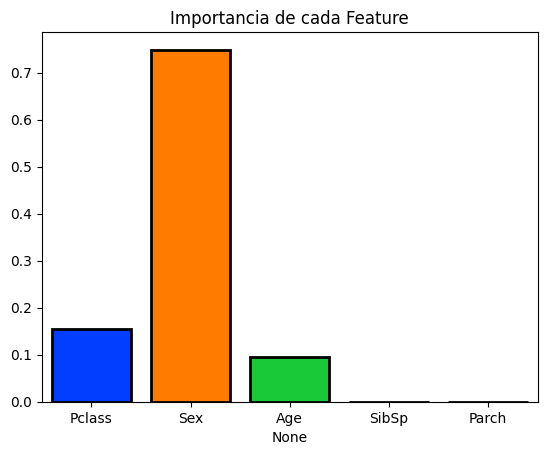

In [ ]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y =  importances , palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 

Entonces las varaibles que renombramos como SibSp y Parch, pueden ser eliminadas.

## Extra ( Un poco de XGBoost)

XGBoost, que significa "eXtreme Gradient Boosting", para implementar algoritmos de boosting en árboles. 

Alto rendimiento y capacidad para manejar conjuntos de datos grandes y complejos.

Aquí hay algunas características clave de XGBoost:

    Gradient Boosting: XGBoost sigue el enfoque de boosting, que implica combinar múltiples modelos débiles (en este caso, árboles de decisión) para formar un modelo más fuerte.

    Regularización: XGBoost incorpora técnicas de regularización para evitar sobreajuste y mejorar la generalización del modelo.

    Manejo de valores perdidos: XGBoost puede manejar valores perdidos en los datos de entrada, evitando imputación previa.

    Funciones de pérdida personalizadas: Permite a los usuarios definir y utilizar sus propias funciones de pérdida para adaptarse a problemas específicos.

    Paralelización y Optimización: XGBoost está diseñado para ser eficiente y escalable, aprovechando la paralelización y la optimización de recursos.
    
    Soporte para múltiples lenguajes de programación: Aunque XGBoost está implementado en C++, ofrece interfaces para varios lenguajes, incluidos Python, R, Java y Scala.


In [49]:
import xgboost as xgb

# Crear un clasificador XGBoost 
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Entrenar el modelo 
model.fit(X_train, y_train)

# Hacer predicciones 
predictions = model.predict(X_test)

Inverted MSE (Train): 0.9506888294021358
Inverted MSE (Test): 0.8393060221933168
     Pclass   Age  SibSp  Parch    Sex
310       2  26.0      1      1  False
317       1  40.0      1      1  False
704       1  42.0      0      0   True
346       3   3.0      1      1   True
489       1  55.0      0      0   True
..      ...   ...    ...    ...    ...
835       1  29.0      0      0   True
192       2   3.0      1      1   True
629       1  32.0      0      0   True
559       2  28.0      0      0   True
684       3  19.0      0      0   True

[665 rows x 5 columns]
El accuracy en train es:  0.8015037593984963
El accuracy en test es:  0.7657657657657657


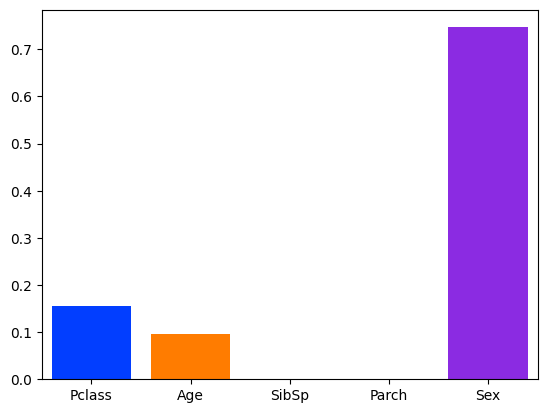

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.drop(['Name', 'Fare'], axis=1, inplace=True)
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.rename(columns ={'Sex_male': 'Sex'}, inplace=True)
X = df.drop('Survived', axis=1)
y= df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=0)

tree.fit(X_train,y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
model = XGBRegressor()
model.fit(X_train,y_train)
y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)
from sklearn.metrics import mean_squared_error



mse_train = mean_squared_error(y_train, y_train_pre)
mse_test = mean_squared_error(y_test, y_test_pre)

inverted_mse_train = 1 -mse_train
inverted_mse_test = 1 -mse_test

print("Inverted MSE (Train):", inverted_mse_train)
print("Inverted MSE (Test):", inverted_mse_test)



train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(X_train)
print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)


importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data, palette='bright', saturation=2.0,  linewidth=2)
plt.show()